# World Autism Prevalence 

## Useful links
- [GeoPandas docs](https://geopandas.org/en/stable/docs/user_guide/mapping.html)
- [GeoPandas tutorial](https://www.google.com/search?q=how+to+plot+a+world+map+in+python&rlz=1C5CHFA_enGB892GB892&oq=how+to+plot+a+world+&aqs=chrome.0.0i512l2j69i57j0i22i30l7.5915j0j7&sourceid=chrome&ie=UTF-8#kpvalbx=_YEXFYpbODLeGhbIP98Ws-Ag16)
- [Medium article](https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b)

## Imports 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

## Basic World Map 

In [2]:
# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
world.to_csv('/Users/alexwilkinson/code/ADWilk19/autism_employment/raw_data/world_autism_prevalence/world.csv')

<AxesSubplot:>

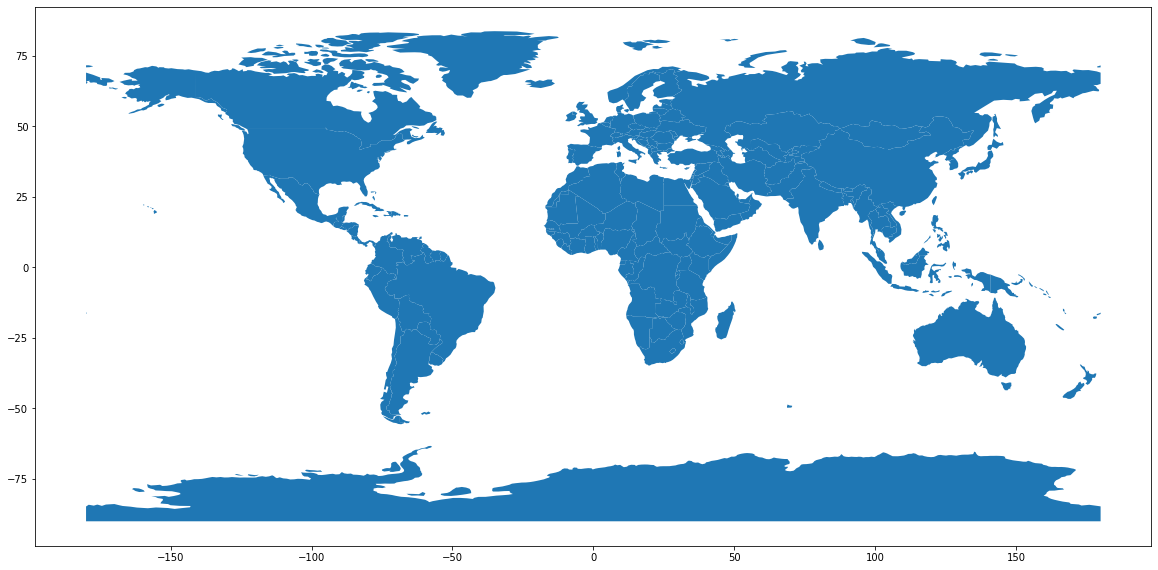

In [3]:
# Plot the map
world.plot(figsize=(20,15))

## EDA and Data Cleaning 

In [ ]:
# Load world autism prevalence data set
aut = pd.read_csv('/Users/alexwilkinson/code/ADWilk19/autism_employment/raw_data/world_autism_prevalence/csvData.csv')
# Preview data frame
aut.head()

In [ ]:
aut.head()

In [69]:
df = pd.read_csv('/Users/alexwilkinson/code/ADWilk19/autism_employment/raw_data/world_autism_prevalence/autism_world_prevalence.csv')

In [70]:
# Merge world and aut DataFrames
merged=pd.merge(world,df,on='name')
# Take a look at the DataFrame
print(merged.head())
print(merged.describe())
print(merged.columns)

       pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  \
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...   
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...   
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...   
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   

   est_autism_prevalence_per_10k  
0                          81.10  
1                          83.10  
2                          83.83  
3                          86.40  
4                  

In [71]:
merged.to_csv('/Users/alexwilkinson/code/ADWilk19/autism_employment/raw_data/world_autism_prevalence/merged.csv')

## Create Static Autism Prevalence map 

In [72]:
merged.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,est_autism_prevalence_per_10k
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",81.10
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",83.10
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",83.83
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",86.40
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",80.90


Text(0.5, 1.0, 'Autism appears to be more prevalent in the Middle East')

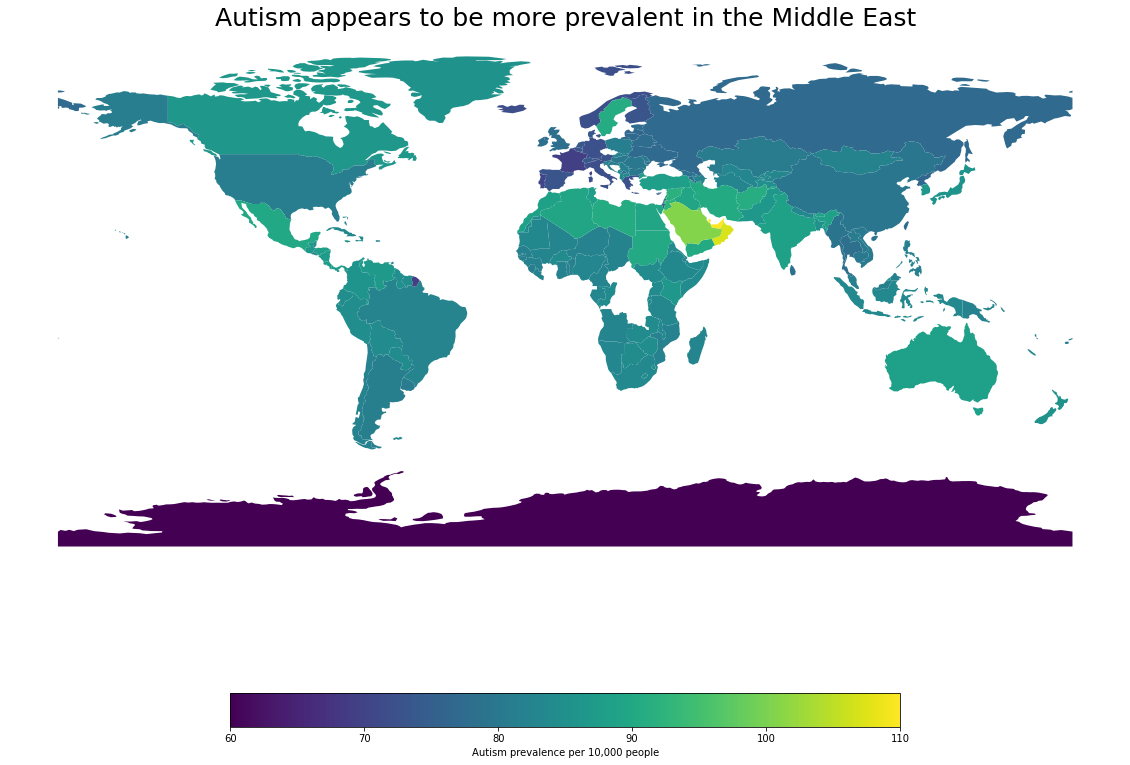

In [82]:
# Create map using matplotlib and the merged DataFrame
merged.plot(column='est_autism_prevalence_per_10k',figsize=(20,15),
            legend=True,
            legend_kwds={'label': "Autism prevalence per 10,000 people",
                        'orientation': "horizontal",
                         'shrink': 0.6},
#             cmap='BuPu', 
            vmin=60.0, vmax=110)
plt.axis('off')
plt.title('Autism appears to be more prevalent in the Middle East',fontsize=25)

## Create Interactive Map 

In [ ]:
import folium
import mapclassify

In [76]:
merged.explore(
     column="est_autism_prevalence_per_10k",  # make choropleth based on "BoroName" column
#      scheme="quantiles",  # use mapclassify's natural breaks scheme
     cmap='BuPu', 
     legend=True, # show legend
     k=10, # number of bins
     vmin = 65,
     vmax = 115
#      legend_kwds=dict(colorbar=True), 
     )